In [622]:
import random
import matplotlib.pyplot as plt

We create *k* actions with unit expected rewards. These expected rewards are used to create normal random distributions with unit variance. When an action is selected we return a reward based on the distribution for that action. 

In [623]:
k = 10
expected_rewards = [random.uniform(-1, 1) for _ in range(k)]

print(expected_rewards)

def action(a):
    return random.normalvariate(expected_rewards[a], 1)

[-0.43966515616208834, -0.33797931439295903, 0.21946555354631014, 0.48907332808128845, -0.9039331419902341, 0.4389594084499173, 0.4818184622423547, 0.9118103032694045, -0.3626481784447835, 0.38947781990291896]


In [624]:
total_reward = 0
average_rewards1 = []

def collect_reward(r, t, ar):
    ar.append((total_reward + r) / t)

We'll now create the functionality to update value estimates. We use a sample average method where we simply average all of the rewards obtained from the selected action so far.

In [625]:
estimates = [0] * k
times_selected = [0] * k

def sample_average_estimate(a, r):
    estimates[a] = (estimates[a] * times_selected[a] + r) / (times_selected[a] + 1)
    times_selected[a] += 1

Let's try a simple greedy action selection method. 

In [626]:
def greedy_select():
    # Select the indicies of all the apparent optimal actions
    max_actions = [action for action, value in enumerate(estimates) if value == max(estimates)]
    # Return a random choice from them
    return random.choice(max_actions)

In [627]:
for i in range(1000):
    a = greedy_select()
    r = action(a)
    sample_average_estimate(a, r)
    total_reward += r
    collect_reward(r, i + 1, average_rewards1)

print(estimates)



[0, 0, 0, 0.4910575987586865, 0, 0, 0, -0.9082423992568309, 0, 0]


We can see that several estimates are not updating because we are not exploring at all. 

To fix this, let's try a slightly more sophisticated action selection method which randomly selects actions with some probability.

In [628]:
def epsilon_greedy_select(epsilon):
    if random.random() < epsilon:
        return random.choice(range(k))
    return greedy_select()

[-0.35874073777315413, -0.6576073125305666, -0.29686532968628176, 0.4885568259230618, -0.36848809072917865, 0.049779790199365716, 0.47307622865263266, 0.9726012473798449, -0.13567259067352178, 0.7295698669284858]


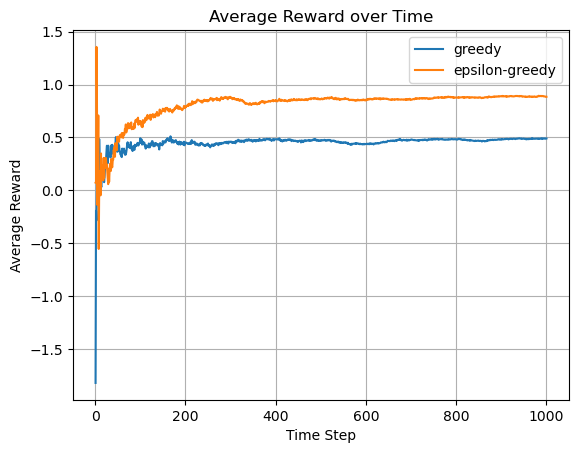

In [629]:
total_reward = 0
average_rewards2 = []

for i in range(1000):
    a = epsilon_greedy_select(0.10)
    r = action(a)
    sample_average_estimate(a, r)
    total_reward += r
    collect_reward(r, i + 1, average_rewards2)

print(estimates)

plt.plot(range(1, len(average_rewards1) + 1), average_rewards1, label="greedy")
plt.plot(range(1, len(average_rewards2) + 1), average_rewards2, label="epsilon-greedy")
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time')
plt.legend()
plt.grid(True)
plt.show()